In [1]:
import torch

In [2]:
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available. Using CPU.")

GPU is available!
Using GPU: NVIDIA GeForce RTX 4050 Laptop GPU


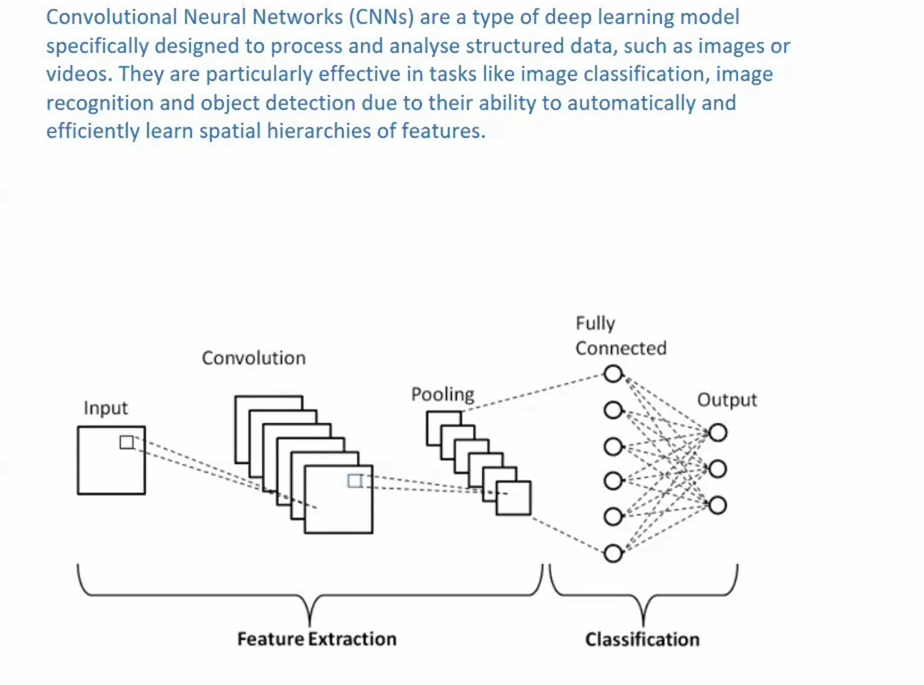

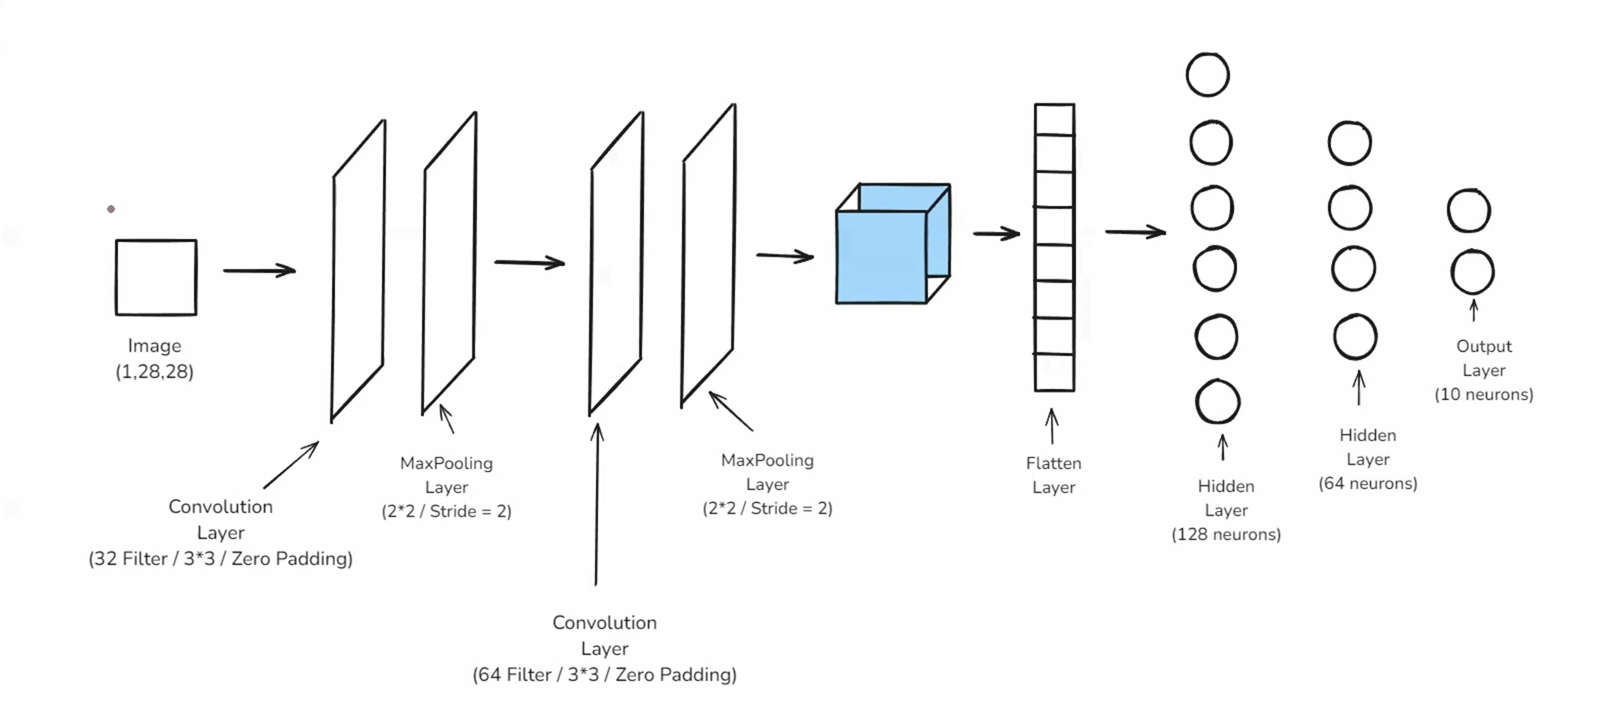

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(42)

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform
transform = transforms.ToTensor()

# Datasets
train_dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transform,
    download=False
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,
    transform=transform,
    download=False
)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("FashionMNIST Loaded Successfully ")


FashionMNIST Loaded Successfully 


In [ ]:
print(len(train_dataset))   
print(len(test_dataset))    

image, label = train_dataset[0]

print(image.shape)  
print(label)      
print(type(image))   
print(image.min(), image.max())

for images, labels in train_loader:
    print(images.shape) 
    print(labels.shape) 
    break

60000
10000
torch.Size([1, 28, 28])
9
<class 'torch.Tensor'>
tensor(0.) tensor(1.)
torch.Size([32, 1, 28, 28])
torch.Size([32])


9


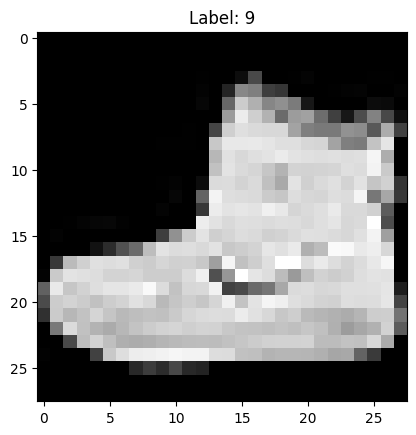

In [13]:
# printing one image 
import matplotlib.pyplot as plt

image, label = train_dataset[0]
print(label)

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.show()


In [8]:
# printing the classes labels 
classes = train_dataset.classes
print(classes)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [14]:
image, label = train_dataset[0]

print(image.min(), image.max())


tensor(0.) tensor(1.)


In [ ]:
class MyNN(nn.Module):
    def __init__(self,input_features):
        super().__init__()  

        self.features = nn.Sequential(
            nn.Conv2d(input_features ,32 , kernel_size=3, padding = 'same' ),  # 32 filters we are using here
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),


            nn.Conv2d(32,64 , kernel_size=3, padding = 'same' ),      # 64 filters we are using here
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear( 64*7*7, 128 ),
            nn.ReLU(128),

            nn.Dropout(p = 0.4),
            nn.Linear(128,64),
            nn.ReLU(64),
            nn.Dropout(p = 0.4),

            nn.Linear(64,10)
           
        )


    def forward( self, x):
        x = self.features(x)
        x = self.classifier(x)

        return x   
    

In [16]:
learning_rate = 0.01
epochs = 100

In [17]:
model = MyNN(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [18]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.7127672604640325
Epoch: 2 , Loss: 0.4209927580873172
Epoch: 3 , Loss: 0.35735104029973347
Epoch: 4 , Loss: 0.32574045537908874
Epoch: 5 , Loss: 0.29958435790141424
Epoch: 6 , Loss: 0.28265352378090225
Epoch: 7 , Loss: 0.2653758941789468
Epoch: 8 , Loss: 0.2551228017285466
Epoch: 9 , Loss: 0.24400754274129868
Epoch: 10 , Loss: 0.23466650692224503
Epoch: 11 , Loss: 0.22374071264863013
Epoch: 12 , Loss: 0.21767580661177635
Epoch: 13 , Loss: 0.2100834867179394
Epoch: 14 , Loss: 0.2040955329934756
Epoch: 15 , Loss: 0.1953788399592042
Epoch: 16 , Loss: 0.19408381081322829
Epoch: 17 , Loss: 0.18620753556340933
Epoch: 18 , Loss: 0.17667770989040535
Epoch: 19 , Loss: 0.1737670079047481
Epoch: 20 , Loss: 0.16919600427647433
Epoch: 21 , Loss: 0.16201194481936593
Epoch: 22 , Loss: 0.15714685079157353
Epoch: 23 , Loss: 0.15131893056171636
Epoch: 24 , Loss: 0.14917279672808945
Epoch: 25 , Loss: 0.14503576098109286
Epoch: 26 , Loss: 0.1400669145077467
Epoch: 27 , Loss: 0.1353987141

In [19]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:

total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

   
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.923


In [ ]:

total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

   
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9990833333333333
